In [1]:
import psycopg2
import seaborn as sns

In [2]:
def total_customers():
    conn = psycopg2.connect(database = "postgres", 
                            user = "postgres", 
                            password = "Hzh@981214", 
                            host = "127.0.0.1", 
                            port = '5432')
    cur = conn.cursor()
    cur.execute('''SELECT year, COUNT(DISTINCT(customer_email)) FROM stout.Customers
                GROUP BY year;''')

    lst = []
    for i in cur:
        lst.append(i)
    return lst
    conn.commit()
    cur.close()
    conn.close()

In [3]:
total_customers()

[(2015, 231294), (2016, 204646), (2017, 249987)]

The number of total customers in 2015 is 231294; The number of total customers in 2016 is 204646; The number of total customers in 2017 is 249987.

In [4]:
def total_revenue():
    conn = psycopg2.connect(database = "postgres", 
                            user = "postgres", 
                            password = "Hzh@981214", 
                            host = "127.0.0.1", 
                            port = '5432')
    cur = conn.cursor()
    cur.execute('''SELECT year, SUM(net_revenue) FROM stout.Customers
                GROUP BY year;''')

    lst = []
    for i in cur:
        lst.append(i)
    return lst
    conn.commit()
    cur.close()
    conn.close()

In [5]:
total_revenue()

[(2015, 29036808.0), (2016, 25730896.0), (2017, 31417716.0)]

The total revenue in 2015 is 29036808; The total revenue in 2016 is 25730896; The total revenue in 2017 is 31417716.

In [6]:
def new_customers(year):
    conn = psycopg2.connect(database = "postgres", 
                            user = "postgres", 
                            password = "Hzh@981214", 
                            host = "127.0.0.1", 
                            port = '5432')
    cur = conn.cursor()
    
    if year == 2016:
        cur.execute('''SELECT SUM(t.count) FROM
            (SELECT COUNT(DISTINCT(customer_email)) AS count FROM stout.Customers
            GROUP BY customer_email
            HAVING MIN(year) = 2016) t''')
    elif year == 2017:
        cur.execute('''SELECT SUM(t.count) FROM
            (SELECT COUNT(DISTINCT(customer_email)) AS count FROM stout.Customers
            GROUP BY customer_email
            HAVING MIN(year) = 2017) t''')

    lst = []
    for i in cur:
        lst.append(i)
    return lst
    conn.commit()
    cur.close()
    conn.close()

In [7]:
new_customers(2016)

[(Decimal('145062'),)]

In [8]:
new_customers(2017)

[(Decimal('228262'),)]

The number of new customers in 2016 is 145062; The number of new customers in 2017 is 228262.

In [9]:
def new_customer_revenue(year):
    conn = psycopg2.connect(database = "postgres", 
                            user = "postgres", 
                            password = "Hzh@981214", 
                            host = "127.0.0.1", 
                            port = '5432')
    cur = conn.cursor()
    
    if year == 2016:
        cur.execute('''SELECT SUM(t.sum_per_customer) FROM 
            (SELECT customer_email, year, SUM(net_revenue) AS sum_per_customer FROM stout.Customers
            GROUP BY customer_email, year
            HAVING MIN(year) = 2016) t
            WHERE year = 2016''')
    elif year == 2017:
        cur.execute('''SELECT SUM(t.sum_per_customer) FROM 
            (SELECT customer_email, year, SUM(net_revenue) AS sum_per_customer FROM stout.Customers
            GROUP BY customer_email, year
            HAVING MIN(year) = 2017) t''')

    lst = []
    for i in cur:
        lst.append(i)
    return lst
    conn.commit()
    cur.close()
    conn.close()

In [10]:
new_customer_revenue(2016)

[(25731016.0,)]

In [11]:
new_customer_revenue(2017)

[(31417344.0,)]

The new customer revenue in 2016 is 25731016; The new customer revenue in 2017 is 31417344.

In [38]:
new_revenue_2017 = new_customer_revenue(2017)
new_revenue_2016 = new_customer_revenue(2016)
new_customer_growth = new_revenue_2017[0][0]-new_revenue_2016[0][0]
print(new_customer_growth)

5686328.0


The new customer growth from 2016 to 2017 is 5686328.0.

In [12]:
def existing_customers(year):
    conn = psycopg2.connect(database = "postgres", 
                            user = "postgres", 
                            password = "Hzh@981214", 
                            host = "127.0.0.1", 
                            port = '5432')
    cur = conn.cursor()
    
    if year == 2016:
        cur.execute('''SELECT COUNT(DISTINCT(customer_email)) FROM stout.Customers
            WHERE year = 2016 AND
            customer_email IN 
            (SELECT DISTINCT(customer_email) FROM stout.Customers 
            WHERE year = 2015)''')
    elif year == 2017:
        cur.execute('''SELECT COUNT(DISTINCT(customer_email)) FROM stout.Customers
            WHERE year = 2017 AND
            customer_email IN 
            (SELECT DISTINCT(customer_email) FROM stout.Customers 
            WHERE year = 2015 OR year = 2016)''')

    lst = []
    for i in cur:
        lst.append(i)
    return lst
    conn.commit()
    cur.close()
    conn.close()

In [13]:
existing_customers(2016)

[(59584,)]

In [14]:
existing_customers(2017)

[(21725,)]

The number of existing customers in 2016 is 59584; The number of existing customers in 2017 is 21725.

In [15]:
def existing_customer_revenue(year):
    conn = psycopg2.connect(database = "postgres", 
                            user = "postgres", 
                            password = "Hzh@981214", 
                            host = "127.0.0.1", 
                            port = '5432')
    cur = conn.cursor()
    
    if year == 2016:
        cur.execute('''SELECT SUM(net_revenue) FROM stout.Customers
            WHERE year = 2016 AND
            customer_email IN 
            (SELECT DISTINCT(customer_email) FROM stout.Customers 
            WHERE year = 2015)''')
    elif year == 2017:
        cur.execute('''SELECT SUM(net_revenue) FROM stout.Customers
            WHERE year = 2017 AND
            customer_email IN 
            (SELECT DISTINCT(customer_email) FROM stout.Customers 
            WHERE year = 2015 OR year = 2016)''')

    lst = []
    for i in cur:
        lst.append(i)
    return lst
    conn.commit()
    cur.close()
    conn.close()

In [16]:
existing_customer_revenue(2016)

[(7485440.0,)]

In [17]:
existing_customer_revenue(2017)

[(2740886.2,)]

The existing customer revenue in 2016 is 7485440; The existing customer revenue in 2017 is 2740886.

In [18]:
existing_revenue_2017 = existing_customer_revenue(2017)
existing_revenue_2016 = existing_customer_revenue(2016)
existing_customer_growth = existing_revenue_2017[0][0]-existing_revenue_2016[0][0]
print(existing_customer_growth)

-4744557.5


The existing customer growth from 2016 to 2017 is -4744557.5.

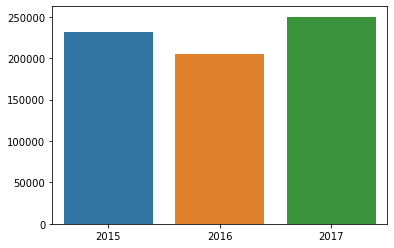

In [48]:
def number_of_customers_plot():
    number_of_customers = total_customers()
    years = [number_of_customers[i][0] for i in range(len(number_of_customers))]
    numbers = [number_of_customers[i][1] for i in range(len(number_of_customers))]
    sns.barplot(x = years, y = numbers)
    
number_of_customers_plot()

From the plot, we can find the total number of customers is highest in 2017 and lowest in 2016.

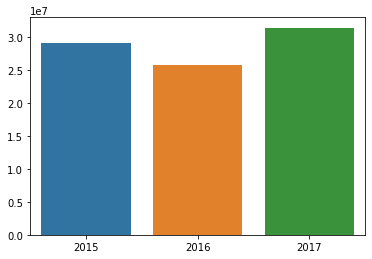

In [47]:
def total_revenue_plot():
    total_revenue_per_year = total_revenue()
    years = [total_revenue_per_year[i][0] for i in range(len(total_revenue_per_year))]
    revenue = [total_revenue_per_year[i][1] for i in range(len(total_revenue_per_year))]
    sns.barplot(x = years, y = revenue)
    
total_revenue_plot()

From the plot, we can find the total revenue is highest in 2017 and lowest in 2016, which is corresponding to the total number of customers.

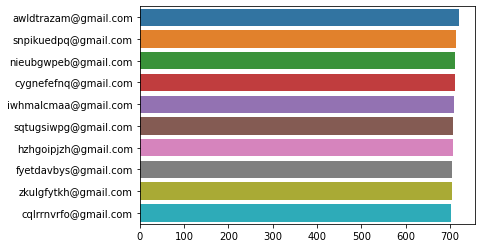

In [49]:
def highest_customers_revenue():
    conn = psycopg2.connect(database = "postgres", 
                            user = "postgres", 
                            password = "Hzh@981214", 
                            host = "127.0.0.1", 
                            port = '5432')
    cur = conn.cursor()
    cur.execute('''SELECT customer_email, SUM(net_revenue) AS sum_revenue FROM stout.Customers
                GROUP BY customer_email
                ORDER BY sum_revenue DESC
                LIMIT 10;''')

    lst = []
    for i in cur:
        lst.append(i)
    return lst
    conn.commit()
    cur.close()
    conn.close()

def highest_customers_revenue_plot():
    highest_revenue = highest_customers_revenue()
    emails = [highest_revenue[i][0] for i in range(len(highest_revenue))]
    revenue = [highest_revenue[i][1] for i in range(len(highest_revenue))]
    sns.barplot(x = revenue, y = emails)
    
highest_customers_revenue_plot()

From the plot, we can see the top 10 customers revenue and all of them are having over 700 net revenue.